-Analisar o crescimento da modalidade de ensino a distância

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
import seaborn as sns
import xlrd 

In [18]:
sns.set(rc={'figure.figsize':(11.7,7.27)})

Importando a tabela

In [2]:
df_ingressantes = pd.read_excel("tabelas_de_divulgacao_censo.xls", sheet_name="Tab3.04", header=None)
df_concluintes = pd.read_excel("tabelas_de_divulgacao_censo.xls", sheet_name="Tab3.05", header=None)

df_ingressantes = df_ingressantes.iloc[7:]
df_ingressantes.drop(71, inplace=True)
df_concluintes = df_concluintes.iloc[8:]
df_concluintes.drop(61, inplace=True)


In [3]:

df_concluintes.columns=[
    'Ano',	'Grau',	'Total geral',	'Total geral publica',	'Total geral federal',	'Total geral estadual',	'Total geral municipal',	'Total geral privada',	'Total geral com fins',	'Total geral sem fins',	'Total presencial',	'Total presencial publica',	'Total presencial federal',	'Total presencial estadual',	'Total presencial municipal',	'Total presencial privada',	'Total presencial com fins',	'Total presencial sem fins',	'Total geral remota',	'Total remota publica',	'Total remota  federal',	'Total remota estadual',	'Total remota municipal',	'Total remota privada',	'Total remota com fins',	'Total remota sem fins'
    ]

df_ingressantes.columns=[
    'Ano',	'Grau',	'Total geral',	'Total geral publica',	'Total geral federal',	'Total geral estadual',	'Total geral municipal',	'Total geral privada',	'Total geral com fins',	'Total geral sem fins',	'Total presencial',	'Total presencial publica',	'Total presencial federal',	'Total presencial estadual',	'Total presencial municipal',	'Total presencial privada',	'Total presencial com fins',	'Total presencial sem fins',	'Total geral remota',	'Total remota publica',	'Total remota  federal',	'Total remota estadual',	'Total remota municipal',	'Total remota privada',	'Total remota com fins',	'Total remota sem fins'
    ]
df_ingressantes

,Ano,Grau,Total geral,Total geral publica,Total geral federal,Total geral estadual,Total geral municipal,Total geral privada,Total geral com fins,Total geral sem fins,...,Total presencial com fins,Total presencial sem fins,Total geral remota,Total remota publica,Total remota federal,Total remota estadual,Total remota municipal,Total remota privada,Total remota com fins,Total remota sem fins
7,2013,Total,2742950,531846,325267,142842,63737,2211104,1187952,1023152,...,837242,895363,515405,36906,26064,3218,7624,478499,350710,127789
8,NaN,Bacharelado,1738272,309384,200840,62937,45607,1428888,722764,706124,...,616154,669610,153363,10239,7462,506,2271,143124,106610,36514
9,NaN,Licenciatura,469237,153372,91410,50921,11041,315865,168308,147557,...,71707,96215,167973,20030,16088,2712,1230,147943,96601,51342
10,NaN,Tecnológico,521766,55766,23794,24883,7089,466000,296880,169120,...,149381,129187,194069,6637,2514,NaN,4123,187432,147499,39933
11,NaN,Não aplicável,13675,13324,9223,4101,0,351,0,351,...,.,351,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,NaN,Bacharelado,2656550,312440,208424,82784,21232,2344110,1860765,483345,...,645453,378269,1342942,22554,5755,16174,625,1320388,1215312,105076
67,NaN,Licenciatura,827285,160083,100268,56902,2913,667202,587294,79908,...,23512,20102,671331,47743,28297,19102,344,623588,563782,59806
68,NaN,Tecnológico,1473062,80239,33372,44006,2861,1392823,1234313,158510,...,80133,44958,1284946,17214,7965,8701,548,1267732,1154180,113552
69,NaN,Não aplicável,37095,16327,11604,4376,347,20768,13685,7083,...,2346,3239,15183,0,0,0,0,15183,11339,3844


In [4]:
#Limpa as linhas vazias, também da reset nos indices 
df_concluintes = df_concluintes.dropna(how='all')
df_concluintes.reset_index(drop=True,inplace=True)

df_ingressantes = df_ingressantes.dropna(how='all')
df_ingressantes.reset_index(drop=True,inplace=True)



In [9]:
#Apagando todas as linhas que possuem valor NaN na coluna Ano
df_ingressantes = df_ingressantes.dropna(subset=['Ano'])

#Convertendo todas as colunas para seus respectivos tipos
df_ingressantes =  df_ingressantes.astype({
    "Ano":int,	"Grau":str,	'Total geral':int,	'Total geral publica':int,	'Total geral federal':int,	'Total geral estadual':int,	'Total geral municipal':int,	'Total geral privada':int,	'Total geral com fins':int,	'Total geral sem fins':int,	'Total presencial':int,	'Total presencial publica':int,	'Total presencial federal':int,	'Total presencial estadual':int,	'Total presencial municipal':int,	'Total presencial privada':int,	'Total presencial com fins':int,	'Total presencial sem fins':int,	'Total geral remota':int,	'Total remota publica':int,	'Total remota  federal':int,	'Total remota estadual':int,	'Total remota municipal':int,	'Total remota privada':int,	'Total remota com fins':int,	'Total remota sem fins':int
})

#Apagando todas as linhas que possuem valor NaN na coluna Ano
df_concluintes = df_concluintes.dropna(subset=['Ano'])

#Convertendo todas as colunas para seus respectivos tipos
df_concluintes =  df_concluintes.astype({
    "Ano":int,	"Grau":str,	'Total geral':int,	'Total geral publica':int,	'Total geral federal':int,	'Total geral estadual':int,	'Total geral municipal':int,	'Total geral privada':int,	'Total geral com fins':int,	'Total geral sem fins':int,	'Total presencial':int,	'Total presencial publica':int,	'Total presencial federal':int,	'Total presencial estadual':int,	'Total presencial municipal':int,	'Total presencial privada':int,	'Total presencial com fins':int,	'Total presencial sem fins':int,	'Total geral remota':int,	'Total remota publica':int,	'Total remota  federal':int,	'Total remota estadual':int,	'Total remota municipal':int,	'Total remota privada':int,	'Total remota com fins':int,	'Total remota sem fins':int
})

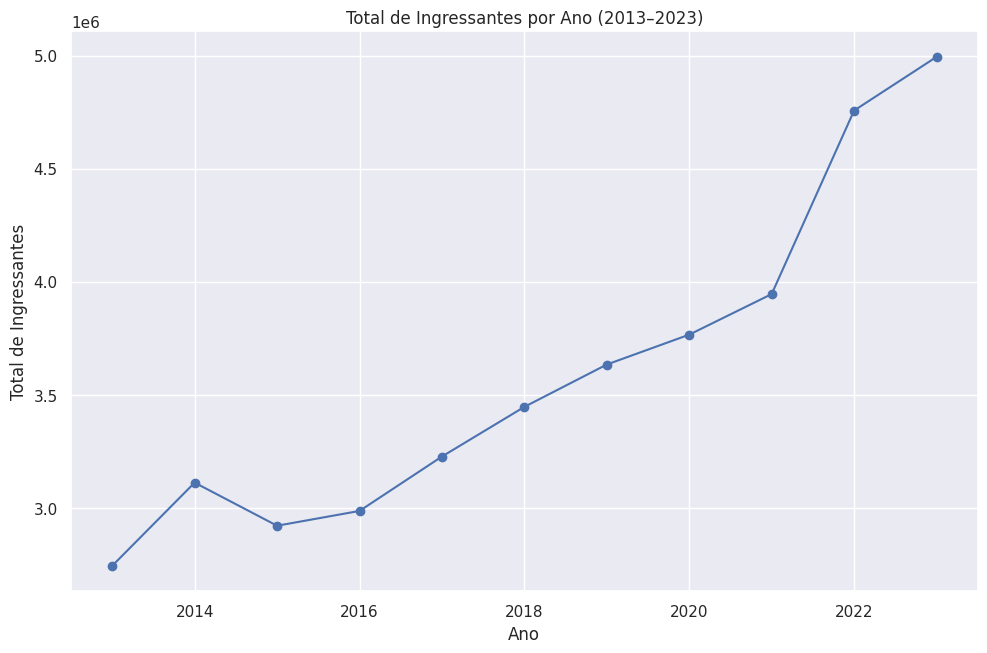

In [20]:
# Plotando o gráfico
plt.plot(df_ingressantes['Ano'], df_ingressantes['Total geral'], marker='o', color='b')
plt.xlabel('Ano')
plt.ylabel('Total de Ingressantes')
plt.title('Total de Ingressantes por Ano (2013–2023)')
plt.grid(True)
plt.show()


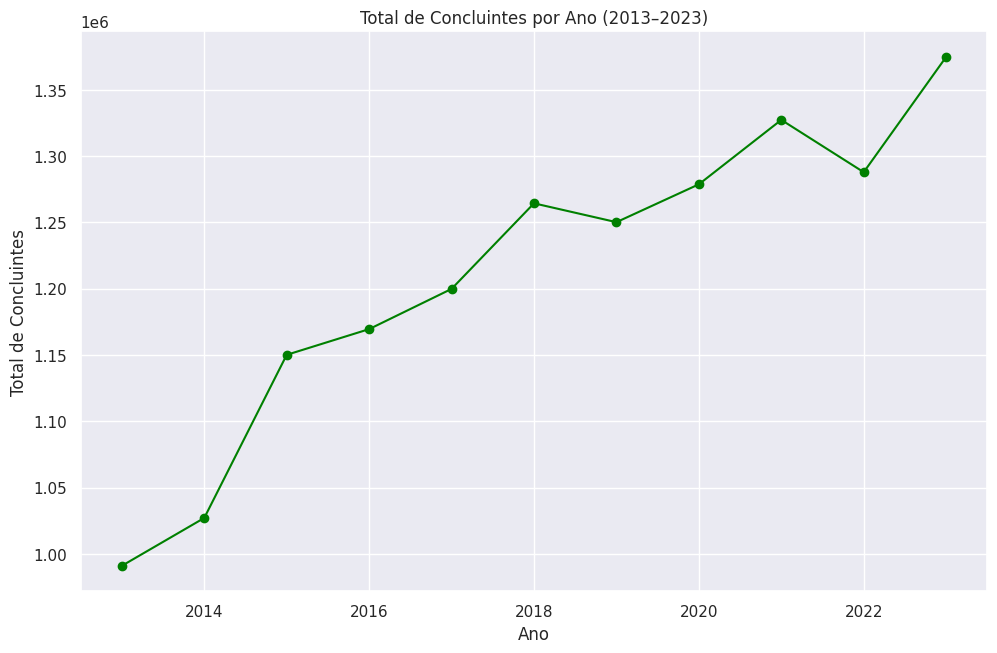

In [ ]:
#Plotando os graficos
plt.plot(df_concluintes['Ano'], df_concluintes['Total geral'], marker='o', color='green')
plt.xlabel('Ano')
plt.ylabel('Total de Concluintes')
plt.title('Total de Concluintes por Ano (2013–2023)')
plt.grid(True)
plt.show()

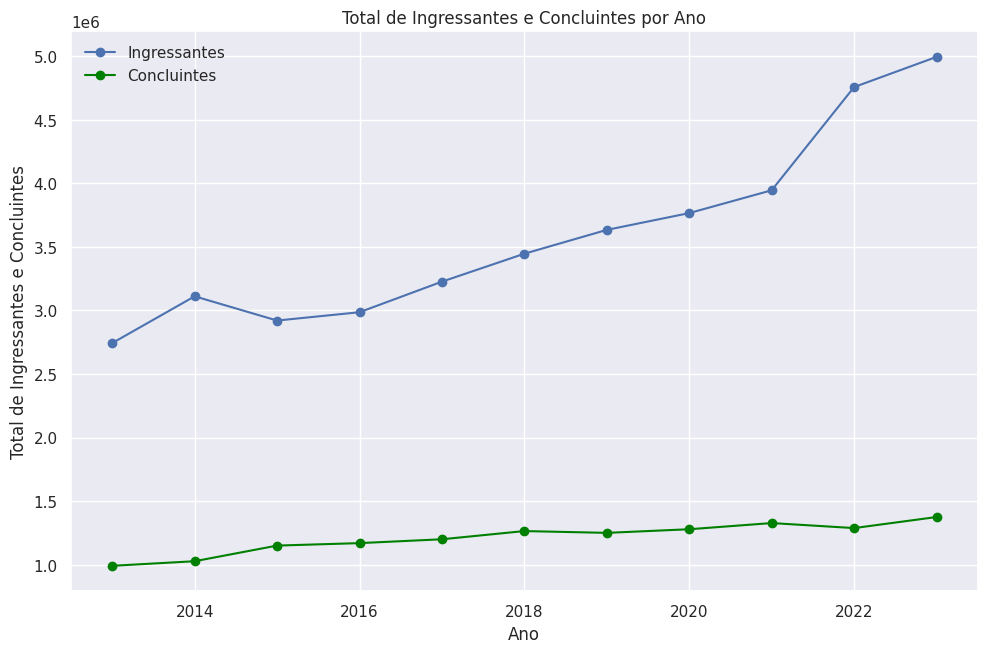

In [22]:
plt.plot(df_ingressantes['Ano'], df_ingressantes['Total geral'], marker='o', color='b')
plt.plot(df_concluintes['Ano'], df_concluintes['Total geral'], marker='o', color='green')
plt.legend(['Ingressantes', 'Concluintes'])
plt.xlabel('Ano')
plt.ylabel('Total de Ingressantes e Concluintes')
plt.title('Total de Ingressantes e Concluintes por Ano')
plt.grid(True)
plt.show()

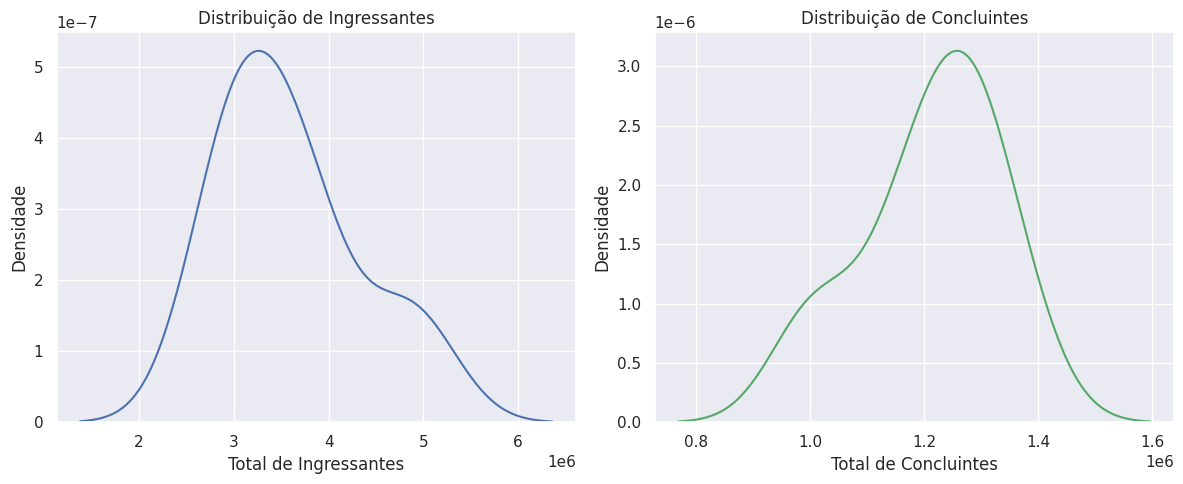

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot para ingressantes
sns.kdeplot(x=df_ingressantes['Total geral'], color='b', ax=axes[0])
axes[0].set_title('Distribuição de Ingressantes')
axes[0].set_xlabel('Total de Ingressantes')
axes[0].set_ylabel('Densidade')

# KDE plot para concluintes
sns.kdeplot(x=df_concluintes['Total geral'], color='g', ax=axes[1])
axes[1].set_title('Distribuição de Concluintes')
axes[1].set_xlabel('Total de Concluintes')
axes[1].set_ylabel('Densidade')

plt.tight_layout()
plt.show()